## DatafestAfrica ML Hackathon

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

## Abstract
 The aim of this project is to train a Machine Learning model to help a Financial Industry predict who is likely to complete an E-process application.

## Preliminary  Wrangling

In [2]:
# downloading the datasets programmatically (from Zion)
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

We will be performing our wrangling on the train dataset.

### Assessing

In [3]:
def info(df):
    print(train.shape),
    print('*' *40),
    print(train.info())
    print('*' *40)

info(train)
train.sample(5)

(12516, 21)
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3     

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
9313,8575744,34,weekly,0,3760,0,3,4,2,4,...,700,61200,0.693073,0.838481,0.567064,0.820078,0.601416,0.601416,9,1
5376,9987069,20,bi-weekly,0,1300,0,3,1,4,2,...,400,52950,0.743652,0.876504,0.620901,0.625559,0.660353,0.460353,14,1
3490,4830802,53,weekly,0,6050,0,4,4,2,1,...,3600,40200,0.721447,0.952999,0.643805,0.856244,0.561224,0.861224,8,1
3613,8026785,35,bi-weekly,1,2020,0,2,2,2,3,...,1100,71050,0.550069,0.850781,0.381149,0.679175,0.408019,0.408019,4,1
4442,2776404,41,bi-weekly,0,3855,1,1,1,4,3,...,1150,80400,0.718216,0.960686,0.798427,0.930326,0.868023,0.668023,4,1


In [6]:
# creating a dataframe to house key numerical variables in the dataset 
num_vars = pd.DataFrame()
num_vars['age'] = train['age']
num_vars['income'] = train['income']
num_vars['amount_requested'] = train['amount_requested']
num_vars['risk_score'] = train['risk_score']

In [7]:
# this returns summary statistics on key numerical variables in the dataset.
num_vars.describe()

,age,income,amount_requested,risk_score
count,12516.000000,12516.000000,12516.000000,12516.000000
mean,43.026766,3654.110658,950.251518,61133.401246
std,11.865891,1508.072163,706.915146,15396.809340
min,18.000000,905.000000,350.000000,2100.000000
25%,34.000000,2575.000000,600.000000,49450.000000
50%,42.000000,3255.000000,700.000000,61200.000000
75%,51.000000,4661.250000,1100.000000,72750.000000
max,96.000000,9985.000000,10200.000000,99750.000000


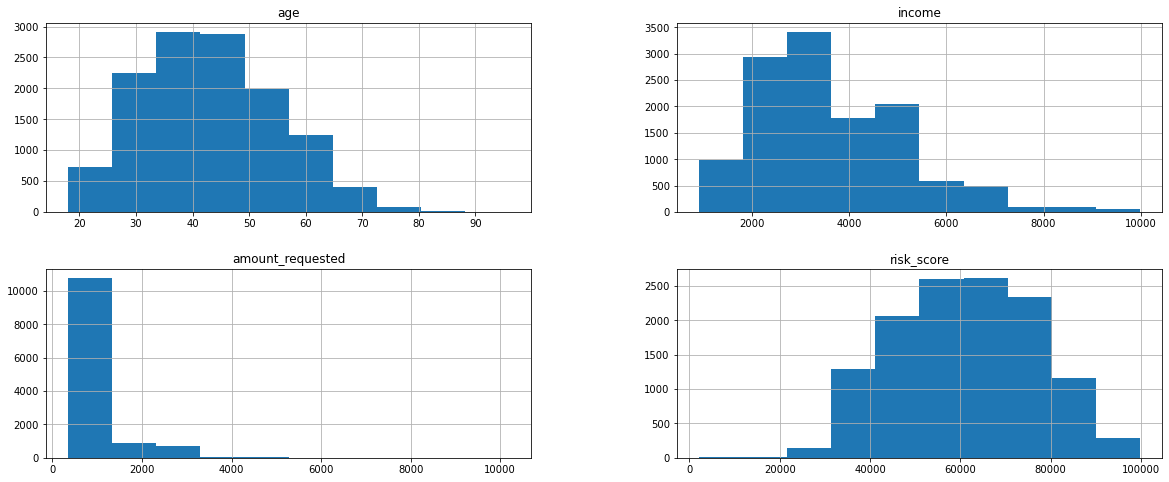

In [8]:
# creating a simple visualization of these numerical variables
num_vars.hist(figsize=(20, 8));

### Quick Observations

- The mean age 

In [14]:
# checking key columns for dulicate entries
train.Entry_id.duplicated().value_counts()

False    12510
True         6
Name: Entry_id, dtype: int64

### Issues
- duplicate entries in the Entry_id column
-

### Cleaning

#### 1. Duplicate entries in the Entry_id column

#### Define: The entry id column contains some duplicate entries that need to be dropped.

#### Code 

In [16]:
#test
sum(train.Entry_id.duplicated())

6

In [17]:
train.drop_duplicates(subset= 'Entry_id', inplace = True)

#### Test


In [18]:
# confirmation 
sum(train.Entry_id.duplicated())

0

## Basic Exploratory Data Analysis.